In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

import plotly
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import math
import pyvis

from pyvis.network import Network
from collections import defaultdict

In [2]:
nxgraph = nx.read_gexf('vk-friends-26725620 (1).gexf')

basic_graph = Network(width='100%', bgcolor="#222222", font_color="white", notebook=True)
basic_graph.barnes_hut()
basic_graph.from_nx(nxgraph)
for node in basic_graph.nodes:
    node['label'] = nxgraph.node[node['id']]['label']
    node['title'] = node['id'] + ' ' + node['label'] 

for edge in basic_graph.edges:
    edge['selectionWidth'] = 15
basic_graph.show('visualizations/basic_graph.html')

Узнаем количество вершин

In [3]:
len(nxgraph.nodes)

262

Сформируем матрицу смежности и список смежности

In [4]:
g_matrix = defaultdict(dict) # adjacency matrix
g_list = defaultdict(set) # adjacency matrix

for user_id in nxgraph.nodes:
    for user_id2 in nxgraph.nodes:
        g_matrix[user_id][user_id2] = 0
        
for edge in nxgraph.edges():
    g_list[edge[0]].add(edge[1])
    g_list[edge[1]].add(edge[0])
    g_matrix[edge[0]][edge[1]] = 1
    g_matrix[edge[1]][edge[0]] = 1

Ради красоты отображения матрицы смежности используем **pandas**

In [5]:
# use pandas for beautiful matrix visualization

pd_matrix = pd.DataFrame(g_matrix)
pd_matrix.head()

,32434,361175,825700,2529151,3335494,3739193,5394269,6053973,6588751,8430229,...,382218561,407098312,411730693,437874046,439448554,453651460,463178873,473374745,500425146,502927118
100001060,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
100988688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101437726,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
101861415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102594780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Уже по визуализации видно, что граф распадается на компоненты связности, но давайте убедимся в этом

In [6]:
nodes_list = list(nxgraph.nodes())
used = dict.fromkeys(nodes_list, False)
current_component = []
shrinked_graph = []

def dfs(cur_node):
    used[cur_node] = True
    current_component.append(cur_node)
    for neighbour in g_list[cur_node]:
        if not used[neighbour]:
            dfs(neighbour)


components_count = 0
for node in nodes_list:
    if not used[node]:
        components_count += 1
        current_component = []
        dfs(node)
        if len(current_component) > len(shrinked_graph):
            shrinked_graph = current_component
        print('Количество вершин в компоненте: ', len(current_component))
        for node in current_component:
            print(nxgraph.nodes[node]['label'], end=' | ')
        print(end='\n\n')
        
        
        

print('Количество компонент = ', components_count)

Количество вершин в компоненте:  235
Александр Знаменский | Павел Машинистов | Дмитрий Прокопенко | Илья Захаров | Диана Березовская | Дарья Сирцева | Анна Носова | Оксана Яковлева | Arina ... | Никита Деменьшин | Дмитрий Турков | Андрей Гусев | Марк Киргизов | Vova Sazhin | Александр Лукичёв | Сергей Призенцов | Дмитрий Тюрин | Наташа Голубева | Мария Пьянко | Егор Чистяков | Александра Богомаз | Дмитрий Смирнов | Артем Бафанов | Полина Шульпина | Ксения Игнатенко | Егор Веренько | Евгений Казаков | Ариша Яковлева | Даниил Макаров | Полина Бычкова | Наталия Соловьёва | Дмитрий Вилков | Эдуард Смирнов | Сергей Позднячкин | Dariya Zhukova | Evgeny Moshenin | Павел Дарьин | Танцпорт Рф | Михаил Новиков | Аленка Абраменко | Даша Митюшкина | Екатерина Морнова | Vladimir Sazhin | Евгений Васильев | Полина Пахомова | Аня Бальдясова | Анастасия Синицина | Дарья Сиц | Марьяна Умнова | Света Соколова | Дарья Власова | Даша Исакова | Катя Серова | Elizaveta Saunina | DELETED  | Мария Померанцева

Стоит сделать заметку, что компоненты, состоящие из одной вершины в визуализации не отображались

Построим гистограмму распределения степеней вершин

In [7]:
count_nodes_by_degree_dict = defaultdict(int)
for node in shrinked_graph:
    count_nodes_by_degree_dict[len(g_list[node])] += 1

for degree in sorted(count_nodes_by_degree_dict):
    print(degree, '\t: ', count_nodes_by_degree_dict[degree])

1 	:  8
2 	:  6
3 	:  10
4 	:  10
5 	:  9
6 	:  17
7 	:  7
8 	:  8
9 	:  9
10 	:  7
11 	:  7
12 	:  11
13 	:  9
14 	:  11
15 	:  4
16 	:  5
17 	:  6
18 	:  10
19 	:  5
20 	:  11
21 	:  6
22 	:  7
23 	:  5
24 	:  5
25 	:  5
26 	:  5
27 	:  3
28 	:  3
29 	:  5
30 	:  3
32 	:  5
33 	:  3
34 	:  2
36 	:  3
40 	:  1
44 	:  1
45 	:  2
55 	:  1


<BarContainer object of 38 artists>

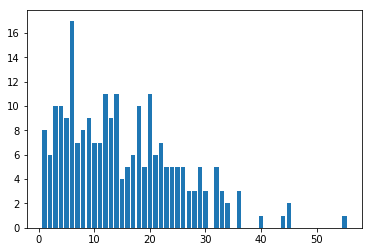

In [8]:
plt.bar(count_nodes_by_degree_dict.keys(), count_nodes_by_degree_dict.values())

In [9]:
nodes_count = 0
degree_sum = 0
for key, value in count_nodes_by_degree_dict.items():
    nodes_count += value
    degree_sum += value * key
    
average_degree = degree_sum / nodes_count
print('Средняя степень вершины: ', average_degree)

Средняя степень вершины:  15.114893617021277


Построим гистрограмму вероятности степени вершины

<BarContainer object of 38 artists>

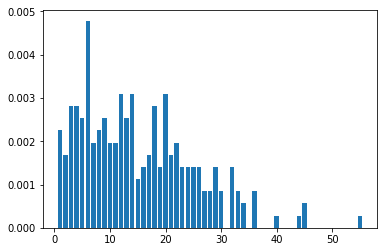

In [10]:
for i in count_nodes_by_degree_dict:
    count_nodes_by_degree_dict[i] /= degree_sum
    
plt.bar(count_nodes_by_degree_dict.keys(), count_nodes_by_degree_dict.values())

Посчитаем расстояние между каждой парой вершин с помощью алгоритма Флойда O(n^3)

In [11]:
dist = defaultdict(lambda: defaultdict(lambda: 99999999))
for node in shrinked_graph:
    dist[node][node] = 0
    for v in g_list[node]:
        dist[node][v] = 1
        dist[v][node] = 1

for k in shrinked_graph:
    for i in shrinked_graph:
        for j in shrinked_graph:
            dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

Получили матрицу расстоянию между вершинами

In [12]:
pd_distance_matrix = pd.DataFrame(dist)
pd_distance_matrix

,32434,118363632,142732817,100988688,156221367,205102170,28566148,53421923,33916048,101861415,...,295536418,25011914,51752657,245412704,169831171,202393554,344710695,141419178,193654647,439448554
100001060,3,2,2,2,2,2,1,1,1,2,...,4,4,5,5,5,5,5,6,6,6
100988688,2,1,2,0,1,1,2,2,1,1,...,4,4,5,5,5,5,5,6,6,6
101437726,6,5,5,5,5,5,6,5,5,5,...,2,2,2,2,2,2,3,4,4,3
101861415,2,1,2,1,1,1,2,1,1,0,...,4,4,5,5,5,5,5,6,6,6
102594780,3,2,2,2,2,2,3,2,2,1,...,4,4,5,5,5,5,5,6,6,6
102945985,6,5,5,5,5,5,6,5,5,5,...,3,3,4,4,4,4,4,5,5,5
103652620,4,3,2,3,3,3,4,3,3,2,...,4,4,5,5,5,5,5,6,6,6
104510299,4,3,4,3,3,4,3,3,2,3,...,6,6,7,7,7,7,7,8,8,8
10454944,6,5,5,5,5,5,6,5,5,5,...,2,2,3,3,3,3,3,4,4,4
107309767,3,2,2,2,2,1,2,1,2,1,...,5,5,6,6,6,6,6,7,7,7


Вычислим **диаметр** и **радиус** графа

Определения:

*Эксцентриситетом вершины называется расстояние до самой дальней вершины графа.*

*Радиусом графа называется минимальный эксцентриситет среди всех вершин графа*

*Диаметром графа - это наибольшее расстояние между всеми парами вершин графа*

In [13]:
# pd_distance_matrix.max() - массив максимумов в столбцах
maxes_in_columns = pd_distance_matrix.max()
diameter = maxes_in_columns.max()
radius = maxes_in_columns.min()

print('Диаметр графа = ', diameter)
print('Радиус графа = ', radius)

Диаметр графа =  9
Радиус графа =  5


Найдём **центральные** и **периферийные** вершины

Справка:

*Центральной вершиной графа является вершина чей эксцентриситет равен радиусу графа.*

*Периферийной вершиной графа является вершина чей эксцентриситет равен диаметру графа.*

In [14]:
center_nodes = []
side_nodes = []
for i in maxes_in_columns.keys():
    if maxes_in_columns[i] == radius:
        center_nodes.append(i)
    if maxes_in_columns[i] == diameter:
        side_nodes.append(i)
        
print('Центральные вершины')
print(center_nodes)
print('\nПериферийные вершины')
print(side_nodes)

Центральные вершины
['62052581', '132961870', '126774312', '40475089', '115173669', '40802691', '139394354', '119441582', '49479521', '62375074', '184632716', '22691473', '216849330', '6053973', '79517210']

Периферийные вершины
['27715061', '189888757', '161462157', '235518326', '99523658', '374868070', '28315548', '76411897', '68625803', '150562030', '90213325', '25670710', '73199393', '182299548', '147066611', '158115400', '187709791', '133531771', '26382944', '14531440', '183442770', '26802847', '141419178', '193654647', '439448554']


Изобразим граф с выделенными Центральными вершинами (жёлтым) и Периферийными вершинами (красным)

In [15]:
central_side_nodes_graph = Network(width='100%', bgcolor="#222222", font_color="white", notebook=True)
central_side_nodes_graph.barnes_hut()
central_side_nodes_graph.from_nx(nxgraph)
for node in central_side_nodes_graph.nodes:
    node['label'] = nxgraph.node[node['id']]['label']
    node['title'] = node['id'] + ' ' + node['label']
    if node['id'] in center_nodes:
        node['color'] = 'yellow'
    if node['id'] in side_nodes:
        node['color'] = 'red'
        
for edge in central_side_nodes_graph.edges:
    edge['selectionWidth'] = 15
central_side_nodes_graph.show('visualizations/central_side_nodes_graph.html')

Рассчитаем среднюю длину пути между вершинами

In [16]:
sum_dist = 0
dist_count = 0

for i in dist:
    for j in dist[i]:
        sum_dist += dist[i][j]
        dist_count += 1

print('Средняя длина пути = ', sum_dist / dist_count)

Средняя длина пути =  3.8149751018560436


Вычислим меры сходства узлов графа

Common Neighbors (число общих соседей): 𝑠(𝑥, 𝑦) = |𝑁(𝑥) ⋂ 𝑁(𝑦)|

In [17]:
common_neighbours_similarity = defaultdict(dict)

for i in shrinked_graph:
    for j in shrinked_graph:
        common_neighbours_similarity[i][j] = len(g_list[i] & g_list[j])

common_neighbours_similarity_matrix = pd.DataFrame(common_neighbours_similarity)
print('Common Neighbors')
common_neighbours_similarity_matrix

Common Neighbors


,32434,118363632,142732817,156221367,271313287,235590279,100001060,3739193,124013752,87927516,...,52297259,22731146,33284217,133917807,6588751,128988300,27715061,161462157,189888757,235518326
100001060,0,6,2,1,2,2,24,6,18,12,...,4,0,15,1,1,3,0,0,0,0
100988688,1,9,5,8,2,0,2,1,4,2,...,1,0,2,0,0,0,0,0,0,0
101437726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101861415,1,11,10,11,2,0,11,5,15,7,...,3,1,7,0,1,2,0,0,0,0
102594780,0,2,1,3,1,0,0,0,2,0,...,0,0,1,0,0,0,0,0,0,0
102945985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103652620,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
104510299,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,0,4,6,4,5
10454944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107309767,0,6,1,3,0,0,2,0,3,2,...,0,0,3,0,0,0,0,0,0,0


Jaccard’s Coefficient (мера Жаккара) 𝑠(𝑥, 𝑦) = |𝑁(𝑥) ⋂ 𝑁(𝑦)| / |𝑁(𝑥) ⋃ 𝑁(𝑦)|

In [18]:
jaccard_similarity = defaultdict(dict)

for i in shrinked_graph:
    for j in shrinked_graph:
        jaccard_similarity[i][j] = len(g_list[i] & g_list[j]) / len(g_list[i] | g_list[j])

jaccard_similarity_matrix = pd.DataFrame(jaccard_similarity)
print('Jaccard’s Coefficient ')
jaccard_similarity_matrix

Jaccard’s Coefficient 


,32434,118363632,142732817,156221367,271313287,235590279,100001060,3739193,124013752,87927516,...,52297259,22731146,33284217,133917807,6588751,128988300,27715061,161462157,189888757,235518326
100001060,0.000000,0.176471,0.057143,0.026316,0.074074,0.074074,1.000000,0.187500,0.428571,0.413793,...,0.142857,0.000000,0.483871,0.038462,0.041667,0.120000,0.000000,0.00,0.000000,0.000000
100988688,0.090909,0.500000,0.263158,0.444444,0.142857,0.000000,0.060606,0.041667,0.093023,0.076923,...,0.055556,0.000000,0.064516,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
101437726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
101861415,0.033333,0.314286,0.303030,0.323529,0.060606,0.000000,0.255814,0.128205,0.294118,0.175000,...,0.085714,0.032258,0.155556,0.000000,0.033333,0.062500,0.000000,0.00,0.000000,0.000000
102594780,0.000000,0.111111,0.062500,0.187500,0.125000,0.000000,0.000000,0.000000,0.052632,0.000000,...,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
102945985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
103652620,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
104510299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.066667,0.000000,0.071429,0.000000,0.000000,0.000000,0.400000,0.75,0.400000,0.500000
10454944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
107309767,0.000000,0.375000,0.055556,0.166667,0.000000,0.000000,0.071429,0.000000,0.076923,0.095238,...,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000


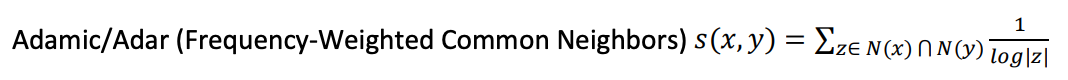

In [19]:
frequency_common_neighbors_similarity = defaultdict(lambda: defaultdict(lambda: float(0)))

for i in shrinked_graph:
    for j in shrinked_graph:
        if i == j:
            frequency_common_neighbors_similarity[i][j] = 1
            continue
        intersect = g_list[i] & g_list[j]
        
        for node in intersect:
            frequency_common_neighbors_similarity[i][j] += 1 / math.log(len(g_list[node]))

frequency_common_neighbors_similarity_matrix = pd.DataFrame(frequency_common_neighbors_similarity)
frequency_common_neighbors_similarity_matrix.fillna(0, inplace=True)
print('Adamic/Adar (Frequency-Weighted Common Neighbors) Coefficient ')
frequency_common_neighbors_similarity_matrix

Adamic/Adar (Frequency-Weighted Common Neighbors) Coefficient 


,32434,118363632,142732817,156221367,271313287,235590279,100001060,3739193,124013752,87927516,...,52297259,22731146,33284217,133917807,6588751,128988300,27715061,161462157,189888757,235518326
100001060,0.000000,1.783250,0.928263,0.283578,0.928263,0.652904,1.000000,1.751814,5.730080,3.813998,...,1.175497,0.000000,4.879521,0.339623,0.288539,0.937034,0.000000,0.000000,0.000000,0.000000
100988688,0.360674,3.098968,1.749434,2.670489,0.640354,0.000000,0.572118,0.283578,1.226805,0.572118,...,0.283578,0.000000,0.582553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
101437726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
101861415,0.360674,3.787041,3.288588,3.738947,0.640354,0.000000,3.344365,1.444886,4.847600,2.142799,...,0.841689,0.314658,2.069654,0.000000,0.288539,0.558111,0.000000,0.000000,0.000000,0.000000
102594780,0.000000,0.627822,0.271085,0.898907,0.271085,0.000000,0.000000,0.000000,0.604682,0.000000,...,0.000000,0.000000,0.294014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
102945985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
103652620,0.000000,0.000000,0.279055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.339623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
104510299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.389871,0.000000,0.947982,0.000000,0.000000,0.000000,2.041027,3.157248,2.041027,2.643350
10454944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
107309767,0.000000,2.052335,0.402430,1.075367,0.000000,0.000000,0.574539,0.000000,0.868553,0.574539,...,0.000000,0.000000,0.868553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Preferential Attachment 𝑠(𝑥, 𝑦) = |𝑁(𝑥)| × |𝑁(𝑦)|

In [20]:
preferential_attachment_similarity = defaultdict(dict)

for i in shrinked_graph:
    for j in shrinked_graph:
        preferential_attachment_similarity[i][j] = len(g_list[i]) * len(g_list[j])

preferential_attachment_similarity_matrix = pd.DataFrame(preferential_attachment_similarity)
print('Preferential Attachment Similarity ')
preferential_attachment_similarity_matrix

Preferential Attachment Similarity 


,32434,118363632,142732817,156221367,271313287,235590279,100001060,3739193,124013752,87927516,...,52297259,22731146,33284217,133917807,6588751,128988300,27715061,161462157,189888757,235518326
100001060,24,384,312,360,120,120,576,336,864,408,...,192,48,528,72,24,96,144,144,144,168
100988688,11,176,143,165,55,55,264,154,396,187,...,88,22,242,33,11,44,66,66,66,77
101437726,26,416,338,390,130,130,624,364,936,442,...,208,52,572,78,26,104,156,156,156,182
101861415,30,480,390,450,150,150,720,420,1080,510,...,240,60,660,90,30,120,180,180,180,210
102594780,4,64,52,60,20,20,96,56,144,68,...,32,8,88,12,4,16,24,24,24,28
102945985,13,208,169,195,65,65,312,182,468,221,...,104,26,286,39,13,52,78,78,78,91
103652620,6,96,78,90,30,30,144,84,216,102,...,48,12,132,18,6,24,36,36,36,42
104510299,8,128,104,120,40,40,192,112,288,136,...,64,16,176,24,8,32,48,48,48,56
10454944,12,192,156,180,60,60,288,168,432,204,...,96,24,264,36,12,48,72,72,72,84
107309767,6,96,78,90,30,30,144,84,216,102,...,48,12,132,18,6,24,36,36,36,42


Для вершин графа рассчитаем нормализованные метрики центральности 

Сначала нормализованные метрики по степени и по близости

In [21]:
centrality = defaultdict(dict)
for node in shrinked_graph:
    centrality['degree'][node] = len(g_list[node]) / (len(shrinked_graph) - 1)
    centrality['closeness'][node] = (len(shrinked_graph) - 1) / pd_distance_matrix[node].sum()

print('Degree and Closeness centrality')
degree_centrality_matrix = pd.DataFrame(centrality)
degree_centrality_matrix

Degree and Closeness centrality


,degree,closeness
100001060,0.102564,0.283293
100988688,0.047009,0.271147
101437726,0.111111,0.279236
101861415,0.128205,0.288177
102594780,0.017094,0.265006
102945985,0.055556,0.264407
103652620,0.025641,0.255180
104510299,0.034188,0.195489
10454944,0.051282,0.271462
107309767,0.025641,0.230542


Посчитаем меру посредничества (в основном bfs + что-то вроде *динамики*)

In [22]:
from collections import deque

shortest_path_membership_count = defaultdict(lambda: 0)
# ATTENTION, THIS WORKS FOR ABOUT A MINUTE !
for i in shrinked_graph:
    for j in shrinked_graph:
        
        node_parents = defaultdict(list)
        dist_to_node = {i : 0}
        q = deque()
        q.append(i)
        while q:
            cur_node = q.popleft()
            for v in g_list[cur_node]:
                if not v in dist_to_node:
                    dist_to_node[v] = dist_to_node[cur_node] + 1
                    q.append(v)
                if dist_to_node[v] == dist_to_node[cur_node] + 1:
                    node_parents[v].append(cur_node)
        
        cur_membership = defaultdict(lambda: 0)
        cur_membership[j] = 1
        q.append(j)
        while q:
            cur_node = q.popleft()
            for v in node_parents[cur_node]:
                if not v in cur_membership:
                    q.append(v)
                cur_membership[v] += cur_membership[cur_node]
        for t in cur_membership:
            if t != i and t != j:
                shortest_path_membership_count[t] += cur_membership[t] / cur_membership[i]

Нормализуем меру посредничества

In [23]:
normalized_shortest_path_membership_count = {}

for i in shrinked_graph:
    if not i in shortest_path_membership_count:
        normalized_shortest_path_membership_count[i] = 0
        centrality['betweeness'][i] = normalized_shortest_path_membership_count[i]
        
for i in shortest_path_membership_count:
    normalized_shortest_path_membership_count[i] = shortest_path_membership_count[i] / (((len(shrinked_graph) - 1) * (len(shrinked_graph) - 2)) / 2) 
    centrality['betweeness'][i] = normalized_shortest_path_membership_count[i]

pd.DataFrame(centrality)

,degree,closeness,betweeness
100001060,0.102564,0.283293,0.012051
100988688,0.047009,0.271147,0.000189
101437726,0.111111,0.279236,0.011061
101861415,0.128205,0.288177,0.019661
102594780,0.017094,0.265006,0.000078
102945985,0.055556,0.264407,0.002739
103652620,0.025641,0.255180,0.010981
104510299,0.034188,0.195489,0.007468
10454944,0.051282,0.271462,0.002671
107309767,0.025641,0.230542,0.000000


Найдем метрику центральности по собственному вектору  
Собственные вектор ищем с помощью power iteration

In [24]:
from numpy import linalg as LA
import numpy as np

shrinked_graph_matrix = defaultdict(dict)
for i in shrinked_graph:
    for j in shrinked_graph:
        if j in g_list[i]:
            shrinked_graph_matrix[i][j] = 1
        else:
            shrinked_graph_matrix[i][j] = 0

cur_id = 0
from_node_to_index = {}
from_index_to_node = {}
for node in shrinked_graph:
    from_node_to_index[node] = cur_id
    from_index_to_node[cur_id] = node
    cur_id += 1

    
real_g_matrix = [[0] * len(shrinked_graph) for i in range(len(shrinked_graph))]
for node in shrinked_graph:
    for v in g_list[node]:
        real_g_matrix[from_node_to_index[node]][from_node_to_index[v]] = 1
        
        
def eigenvalue(A, v):
    Av = A.dot(v)
    return v.dot(Av)

def power_iteration(A):
    n, d = A.shape

    v = np.ones(d) / np.sqrt(d)
    ev = eigenvalue(A, v)

    while True:
        Av = A.dot(v)
        v_new = Av / np.linalg.norm(Av)

        ev_new = eigenvalue(A, v_new)
        if np.abs(ev - ev_new) < 0.01:
            break

        v = v_new
        ev = ev_new

    return ev_new, v_new

        
np_shrinked_matrix = np.array(real_g_matrix)

eigen_values, eigen_vector = power_iteration(np_shrinked_matrix)
        
pd.DataFrame(eigen_vector)

,0
0,0.000751
1,0.016574
2,0.015566
3,0.016030
4,0.004790
5,0.004814
6,0.029339
7,0.019966
8,0.042682
9,0.020757


In [25]:
for i in range(len(eigen_vector)):
    centrality['eigen_vector'][from_index_to_node[i]] = eigen_vector[i]
    
pd.DataFrame(centrality)

,degree,closeness,betweeness,eigen_vector
100001060,0.102564,0.283293,0.012051,0.029339
100988688,0.047009,0.271147,0.000189,0.012158
101437726,0.111111,0.279236,0.011061,0.135056
101861415,0.128205,0.288177,0.019661,0.034618
102594780,0.017094,0.265006,0.000078,0.006288
102945985,0.055556,0.264407,0.002739,0.046914
103652620,0.025641,0.255180,0.010981,0.007322
104510299,0.034188,0.195489,0.007468,0.000977
10454944,0.051282,0.271462,0.002671,0.059462
107309767,0.025641,0.230542,0.000000,0.006684


Найдем метрику edge betweeness

In [26]:
from collections import deque

shortest_path_edge_membership_count = defaultdict(lambda: 0)

# ATTENTION, THIS WORKS FOR ABOUT A MINUTE !
for i in shrinked_graph:
    for j in shrinked_graph:
        
        node_parents = defaultdict(list)
        dist_to_node = {i : 0}
        q = deque()
        q.append(i)
        while q:
            cur_node = q.popleft()
            for v in g_list[cur_node]:
                if not v in dist_to_node:
                    dist_to_node[v] = dist_to_node[cur_node] + 1
                    q.append(v)
                if dist_to_node[v] == dist_to_node[cur_node] + 1:
                    node_parents[v].append(cur_node)
                    
        cur_membership = defaultdict(lambda: 0)
        cur_membership[j] = 1
        cur_edge_membership = defaultdict(lambda: 0)
        q.append(j)
        while q:
            cur_node = q.popleft()
            for v in node_parents[cur_node]:
                if not v in cur_membership:
                    q.append(v)
                cur_edge_membership[(min(cur_node, v), max(cur_node, v))] += cur_membership[cur_node]
                cur_membership[v] += cur_membership[cur_node]
        for t in cur_edge_membership:
            shortest_path_edge_membership_count[t] += cur_edge_membership[t] / cur_membership[i]

In [27]:
edge_centrality = defaultdict(dict)
normalized_shortest_path_edge_membership_count = shortest_path_edge_membership_count
for i in normalized_shortest_path_edge_membership_count:
    normalized_shortest_path_edge_membership_count[i] = normalized_shortest_path_edge_membership_count[i] / (((len(shrinked_graph)) * (len(shrinked_graph) - 1)) / 2) 
    edge_centrality['betweenes'][i] = normalized_shortest_path_edge_membership_count[i]

pd.DataFrame(edge_centrality)

betweenes
100001060 114119365   0.000782
          115173669   0.015306
          119605475   0.000604
          124013752   0.000652
          137856589   0.000469
          139743287   0.000592
          145403162   0.000780
          194487439   0.000438
          235590279   0.002717
          28566148    0.001368
          29880354    0.001477
          302682292   0.000823
          33284217    0.000681
          33916048    0.000969
          3739193     0.000875
          382218561   0.002412
          39049179    0.000628
          45261843    0.000449
          50064643    0.001548
          53421923    0.000618
          63467002    0.002723
          65735479    0.000907
          87927516    0.000963
          88546851    0.000825
100988688 101861415   0.000874
          118363632   0.000325
          127858084   0.000244
          132961870   0.005326
          139743287   0.001043
          152244325   0.000663
...                        ...
65027270  96867641    0.000419
65735479  66493458    0.000286
          81812619    0.000929
66493458  81812619    0.000883
66547575  87927516    0.001204
67016355  68625803    0.000893
          82892660    0.001099
          88181434    0.000666
          96867641    0.000761
68582328  90213325    0.000768
68625803  90213325    0.000463
70758701  99523658    0.008791
73199393  8430229     0.001106
          90572207    0.003692
74350432  84323356    0.000497
          87818274    0.000788
          98292398    0.000625
75698525  94085838    0.000281
76411897  81413470    0.000596
          82892660    0.002542
81090939  88181434    0.003780
          90572207    0.001542
82892660  90213325    0.001675
          95350384    0.000794
8430229   90572207    0.000576
84323356  98292398    0.000758
88181434  95350384    0.000493
90213325  95350384    0.000539
          96867641    0.001007
94085838  96867641    0.000340

[1776 rows x 1 columns]

Визуализируем все полученные метрики

На всех визуализациях, размер вершины и количество жёлтого цвета увеличиваются, по мере увеличения соответствующей метрики

Центральность по степени:

In [28]:
vis_degree_centrality = Network(width='100%', bgcolor="#222222", font_color="white", notebook=True)
vis_degree_centrality.barnes_hut()
vis_degree_centrality.from_nx(nxgraph)
degree_centrality_min = min(centrality['degree'].items(), key = lambda x: x[1])[1]
degree_centrality_max = max(centrality['degree'].items(), key = lambda x: x[1])[1]
for node in vis_degree_centrality.nodes:
    normalized_centrality = max(0, (centrality['degree'].get(node['id'], 0) - degree_centrality_min) / (degree_centrality_max - degree_centrality_min))
    node['label'] = nxgraph.node[node['id']]['label']
    node['title'] = node['id'] + ' ' + node['label']
    node['value'] = normalized_centrality * 10
    node['color'] = 'rgb(255, {0}, 0)'.format(normalized_centrality * 255)
    node['scaling'] = {'min': 5, 'max': 150}
for edge in vis_degree_centrality.edges:
    edge['selectionWidth'] = 15
vis_degree_centrality.show('visualizations/vis_degree_centrality.html')

Центральность по близости

In [29]:
vis_closeness_centrality = Network(width='100%', bgcolor="#222222", font_color="white", notebook=True)
vis_closeness_centrality.barnes_hut()
vis_closeness_centrality.from_nx(nxgraph)
closeness_centrality_min = min(centrality['closeness'].items(), key = lambda x: x[1])[1]
closeness_centrality_max = max(centrality['closeness'].items(), key = lambda x: x[1])[1]
for node in vis_closeness_centrality.nodes:
    normalized_centrality = max(0, (centrality['closeness'].get(node['id'], 0) - closeness_centrality_min) / (closeness_centrality_max - closeness_centrality_min))

    node['label'] = nxgraph.node[node['id']]['label']
    node['title'] = node['label'] + ' ' + node['label']
    node['value'] = normalized_centrality * 10
    node['color'] = 'rgb(255, {0}, 0)'.format(normalized_centrality * 255)
    node['scaling'] = {'min': 5, 'max': 150}
for edge in vis_closeness_centrality.edges:
    edge['selectionWidth'] = 15
vis_closeness_centrality.show('visualizations/vis_closeness_centrality.html')

Центральность по посредничеству

In [30]:
vis_betweeness_centrality = Network(width='100%', bgcolor="#222222", font_color="white", notebook=True)
vis_betweeness_centrality.barnes_hut()
vis_betweeness_centrality.from_nx(nxgraph)
betweeness_centrality_min = min(centrality['betweeness'].items(), key = lambda x: x[1])[1]
betweeness_centrality_max = max(centrality['betweeness'].items(), key = lambda x: x[1])[1]
for node in vis_betweeness_centrality.nodes:
    normalized_centrality = max(0, (centrality['betweeness'].get(node['id'], 0) - betweeness_centrality_min) / (betweeness_centrality_max - betweeness_centrality_min))
    node['label'] = nxgraph.node[node['id']]['label']
    node['title'] = node['label'] + ' ' + node['title']
    node['value'] = normalized_centrality * 10
    node['color'] = 'rgb(255, {0}, 0)'.format(normalized_centrality * 255)
    node['scaling'] = {'min': 5, 'max': 150}
for edge in vis_betweeness_centrality.edges:
    edge['selectionWidth'] = 15
vis_betweeness_centrality.show('visualizations/vis_betweeness_centrality.html')

Центральность по собственному вектору

In [31]:
vis_eigen_vector_centrality = Network(width='100%', bgcolor="#222222", font_color="white", notebook=True)
vis_eigen_vector_centrality.barnes_hut()
vis_eigen_vector_centrality.from_nx(nxgraph)
eigen_vector_centrality_min = min(centrality['eigen_vector'].items(), key = lambda x: x[1])[1]
eigen_vector_centrality_max = max(centrality['eigen_vector'].items(), key = lambda x: x[1])[1]
for node in vis_eigen_vector_centrality.nodes:
    normalized_centrality = max(0, (centrality['eigen_vector'].get(node['id'], 0) - eigen_vector_centrality_min) / (eigen_vector_centrality_max - eigen_vector_centrality_min))
    node['label'] = nxgraph.node[node['id']]['label']
    node['title'] = node['label'] + ' ' + node['title']
    node['value'] = normalized_centrality * 10
    node['color'] = 'rgb(255, {0}, 0)'.format(normalized_centrality * 255)
    node['scaling'] = {'min': 5, 'max': 150}
for edge in vis_eigen_vector_centrality.edges:
    edge['selectionWidth'] = 15
vis_eigen_vector_centrality.show('visualizations/vis_eigen_vector_centrality.html')

Edge betweenes centrality

In [32]:
vis_edge_betweenes_centrality = Network(width='100%', bgcolor="#222222", font_color="white", notebook=True)
vis_edge_betweenes_centrality.barnes_hut()
vis_edge_betweenes_centrality.from_nx(nxgraph)
edge_betweenes_centrality_min = min(edge_centrality['betweenes'].items(), key = lambda x: x[1])[1]
edge_betweenes_centrality_max = max(edge_centrality['betweenes'].items(), key = lambda x: x[1])[1]
for node in vis_edge_betweenes_centrality.nodes:
    node['label'] = nxgraph.node[node['id']]['label']
    node['title'] = node['label'] + ' ' + node['title']
for edge in vis_edge_betweenes_centrality.edges:
    normalized_centrality = max(0, (edge_centrality['betweenes'].get((min(edge['from'], edge['to']), max(edge['from'], edge['to'])), 0) - edge_betweenes_centrality_min) / (edge_betweenes_centrality_max - edge_betweenes_centrality_min))
    edge['selectionWidth'] = 15
    edge['color'] = 'rgb(255, {0}, 0)'.format(normalized_centrality * 255)
    edge['scaling'] = {'min': 5, 'max': 70}
    edge['value'] = normalized_centrality * 10
vis_edge_betweenes_centrality.show('visualizations/vis_edge_betweenes_centrality.html')

Экспортируем всё в требуемый вид
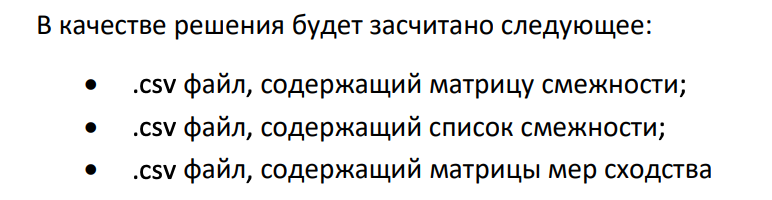

In [33]:
pd_matrix.to_csv('csv/adjacency_matrix.csv')

In [34]:
import csv

with open("csv/adjacency_list.csv", 'w', newline='') as write_file:
    writer = csv.writer(write_file, delimiter=',')
    writer.writerow(['-'] * len(g_matrix))
    for node in g_list:
        cur_list = [node]
        for adjacent_node in g_list[node]:
            cur_list.append(adjacent_node)
        writer.writerow(cur_list)

In [35]:
common_neighbours_similarity_matrix.to_csv('csv/common_neighbours_similarity.csv')
jaccard_similarity_matrix.to_csv('csv/jaccard_similarity_matrix.csv')
frequency_common_neighbors_similarity_matrix.to_csv('csv/frequency_common_neighbors_similarity_matrix.csv')
preferential_attachment_similarity_matrix.to_csv('csv/preferential_attachment_similarity_matrix.csv')